## Importing the Libraries

These are all imported so that they can be used to manipulate and analyze the data from the imported csv file. The models from sklearn and tensorflow are imported to train and test the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from prettytable import PrettyTable

## Reading the Dataset

`nasa` is created here by using pandas to read the csv file and pull all the data into one data frame.

In [2]:
nasa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS 430 Machine Learning/FinalProject_MEH/nasa.csv')

## Exploring the Dataset

`nasa.head()` allows the user to see the first 5 rows of the dataset. `nasa.info()` allows the user to see the total number of entries, the datatypes of each column, how many entries are null / not null, and each column in the dataset.

In [3]:
nasa.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [4]:
nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

## Label Encoder to Encode Data

`LabelEnocder` is called from sklearn to encode the object data in the dataset. Four columns from the dataset are objects, so they are encoded here so that every column in the dataset is numerical. The target column, `Hazardous`, is also encoded to be numerical, as well. It is checked by doing `nasa.info()` and seeing the all the columns have numerical data.

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
nasa['Close Approach Date'] = le.fit_transform(nasa['Close Approach Date'])
nasa['Orbiting Body'] = le.fit_transform(nasa['Orbiting Body'])
nasa['Orbit Determination Date'] = le.fit_transform(nasa['Orbit Determination Date'])
nasa['Equinox'] = le.fit_transform(nasa['Equinox'])
nasa['Hazardous'] = le.fit_transform(nasa['Hazardous'])

In [6]:
nasa.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,0,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,0,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,0,1


In [7]:
nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   int64  
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

## Splitting the Dataset

The x and y variables are created here where in x, the target column is dropped, leaving the rest of the dataset in x, and y only has the target column. `nasa.Hazardous.value_counts()` is called to determine if `nasa` is evenly distributed. Since it is not, y needs to be stratified later.

In [8]:
x = nasa.drop(['Hazardous'], axis = 1)
y = nasa['Hazardous']

In [9]:
nasa.Hazardous.value_counts()

0    3932
1     755
Name: Hazardous, dtype: int64

## Training, Testing, and Splitting the Dataset

`train_test_split` is called from sklearn to split the data 80/20 into 4 different parts: `x_train`, `x_test`, `y_train`, and `y_test`. `y` is also stratified since the target column is not evenly distributed.

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

## Scaling the Dataset

`StandardScaler()` is called from `sklearn.preprocessing` to take the x training and testing sets and scaling them to fit the rest of the data and make the model more accurate. Since this is a classification problem, only the x sets need to be scaled. This is useful because SVC requires scaling or else the model will not be trained correctly. It also will not impact the other classification techniques, only SVC.

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Logistic Regression

`lr` is a variable that holds the `LogisticRegression()` model. It is fit with `x_train` and `y_train`. The current scores shows that the model is very accurate and is not overfitted or underfitted since both the training and testing scores are both 95%. The MSE evaluates the performance and the RMSE is used to measure the model performance. The MSE is very small, meaning that the logistic regression model is very accurate. The RMSE is not great, but also not horrible with the accuracy being 0.21. The confusion matrix shows that it did well finding true positives and true negatives, yet still had some error and found 20 false positives and 20 false negatives. The classification report shows that the logistic regression model did a better job of finding 0's (not hazardous) than it did finding 1's (hazardous).

In [12]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [13]:
lr_score_train = lr.score(x_train, y_train)
lr_score_train

0.9594558548946386

In [14]:
lr_score_test = lr.score(x_test, y_test)
lr_score_test

0.9573560767590619

In [15]:
y_pred_lr = lr.predict(x_test)

In [16]:
MSE_lr = mean_squared_error(y_test, y_pred_lr, squared = True)
print(MSE_lr)

0.042643923240938165


In [17]:
RMSE_lr = mean_squared_error(y_test, y_pred_lr, squared = False)
print(RMSE_lr)

0.20650405139110023


In [18]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[767  20]
 [ 20 131]]


In [19]:
cr_lr = classification_report(y_test, y_pred_lr)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       787
           1       0.87      0.87      0.87       151

    accuracy                           0.96       938
   macro avg       0.92      0.92      0.92       938
weighted avg       0.96      0.96      0.96       938



## Random Forest Classification

`rfc` is a variable that holds the `RandomForestClassifier()` model. It is fit with `x_train` and `y_train`. The current scores shows that the model is very accurate and is not overfitted or underfitted since both the training and testing scores are around 100%. The MSE evaluates the performance and the RMSE is used to measure the model performance. The MSE is very small, meaning that the logistic regression model is very accurate. The RMSE is also extremely small, meaning that the model is very accurate. The confusion matrix shows that it did well finding true positives and true negatives, yet still had some error and found 3 false positives and 2 false negatives. The classification report shows that the random forest model did a good job of finding both the 0's (not hazardous) and 1's (hazardous).

In [20]:
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [21]:
rfc_score_train = rfc.score(x_train, y_train)
rfc_score_train

1.0

In [22]:
rfc_score_test = rfc.score(x_test, y_test)
rfc_score_test

0.9946695095948828

In [23]:
y_pred_rfc = rfc.predict(x_test)

In [24]:
MSE_rfc = mean_squared_error(y_test, y_pred_rfc, squared = True)
print(MSE_rfc)

0.005330490405117271


In [25]:
RMSE_rfc = mean_squared_error(y_test, y_pred_rfc, squared = False)
print(RMSE_rfc)

0.07301020754057114


In [26]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print(cm_rfc)

[[784   3]
 [  2 149]]


In [27]:
cr_rfc = classification_report(y_test, y_pred_rfc)
print(cr_rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       0.98      0.99      0.98       151

    accuracy                           0.99       938
   macro avg       0.99      0.99      0.99       938
weighted avg       0.99      0.99      0.99       938



## Decision Tree Classification

`dtc` is a variable that holds the `DecisionTreeClassifier()` model. It is fit with `x_train` and `y_train`. The current scores shows that the model is very accurate and is not overfitted or underfitted since both the training and testing scores are around 100%. The MSE evaluates the performance and the RMSE is used to measure the model performance. The MSE is very small, meaning that the logistic regression model is very accurate. The RMSE is also extremely small, meaning that the model is accurate. The confusion matrix shows that it did well finding true positives and true negatives, yet still had some error and found 2 false positives and 1 false negative. The classification report shows that the random forest model did a good job of finding both the 0's (not hazardous) and 1's (hazardous).

In [28]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [29]:
dtc_score_train = dtc.score(x_train, y_train)
dtc_score_train

1.0

In [30]:
dtc_score_test = dtc.score(x_test, y_test)
dtc_score_test

0.9968017057569296

In [31]:
y_pred_dtc = dtc.predict(x_test)

In [32]:
MSE_dtc = mean_squared_error(y_test, y_pred_dtc, squared = True)
print(MSE_dtc)

0.0031982942430703624


In [33]:
RMSE_dtc = mean_squared_error(y_test, y_pred_dtc, squared = False)
print(RMSE_dtc)

0.056553463581555836


In [34]:
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print(cm_dtc)

[[785   2]
 [  1 150]]


In [35]:
cr_dtc = classification_report(y_test, y_pred_dtc)
print(cr_dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       0.99      0.99      0.99       151

    accuracy                           1.00       938
   macro avg       0.99      1.00      0.99       938
weighted avg       1.00      1.00      1.00       938



## Support Vector Classification

`svc` is a variable that holds the `SVC()` model. It is fit with `x_train` and `y_train`. The current scores shows that the model is very accurate and is not entirely overfitted or underfitted since both the training and testing scores are between 97% and 94%. The MSE evaluates the performance and the RMSE is used to measure the model performance. The MSE is very small, meaning that the logistic regression model is very accurate. The RMSE is also small, but not as small as previous models being around 0.24. The confusion matrix shows that it did well finding true positives and true negatives, yet still had some error and found around 18 false positives and around 35 false negatives. The classification report shows that the random forest model did a better job of finding the 0's (not hazardous), not the 1's (hazardous).

In [36]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [37]:
svc_score_train = svc.score(x_train, y_train)
svc_score_train

0.9642571352360629

In [38]:
svc_score_test = svc.score(x_test, y_test)
svc_score_test

0.9434968017057569

In [39]:
y_pred_svc = svc.predict(x_test)

In [40]:
MSE_svc = mean_squared_error(y_test, y_pred_svc, squared = True)
print(MSE_svc)

0.05650319829424307


In [41]:
RMSE_svc = mean_squared_error(y_test, y_pred_svc, squared = False)
print(RMSE_svc)

0.23770401404739272


In [42]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(cm_svc)

[[769  18]
 [ 35 116]]


In [43]:
cr_svc = classification_report(y_test, y_pred_svc)
print(cr_svc)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       787
           1       0.87      0.77      0.81       151

    accuracy                           0.94       938
   macro avg       0.91      0.87      0.89       938
weighted avg       0.94      0.94      0.94       938



## MLP

`mlp` is a variable that holds the MLP `Sequential()` model. It has 3 Dense layers where two layers have activation `relu` and the final layer has activation `sigmoid`. The model is compiled and `history` is fit with `x_train` and `y_train`, validation data being `x_test` and `y_test`, epochs equal to 150, and batch size equal to 32. The loss is 0.05% and the accuracy is 0.99%. This shows that the model is very accurate. The MSE evaluates the performance and the RMSE is used to measure the model performance. The MSE is very small, meaning that the logistic regression model is very accurate. The RMSE is also fairly small, yet not the smallest of the models. The confusion matrix shows that it did well finding true positives and true negatives, yet still had some error and found 4-5 false positives and 8 false negatives. The classification report shows that the random forest model did a good job of finding both the 0's (not hazardous) and 1's (hazardous).

In [44]:
n_features = x_train.shape[1]
print(n_features)

39


In [45]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape = (n_features, )))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [46]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
history = model.fit(x_train, y_train, epochs = 150, validation_data = (x_test, y_test), batch_size = 32, verbose = 0)

In [48]:
y_pred_mlp = model.predict(x_test)
y_pred_mlp = (y_pred_mlp > 0.5)

30/30 [==============================] - 0s 1ms/step


In [49]:
MSE_mlp = mean_squared_error(y_test, y_pred_mlp, squared = True)
print(MSE_mlp)

0.015991471215351813


In [50]:
RMSE_mlp = mean_squared_error(y_test, y_pred_mlp, squared = False)
print(RMSE_mlp)

0.12645738893141759


In [51]:
loss, acc = model.evaluate(x_test, y_test, verbose = 0)
print(f'Loss Value: {loss}')
print(f'Accuracy Value: {acc}')

Loss Value: 0.06221102178096771
Accuracy Value: 0.9840085506439209


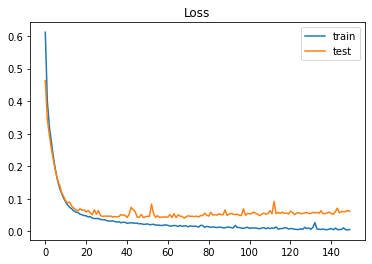

In [52]:
plt.title('Loss')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

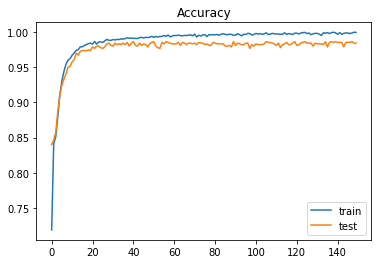

In [53]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

In [54]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print(cm_mlp)

[[779   8]
 [  7 144]]


In [55]:
cr_mlp = classification_report(y_test, y_pred_mlp)
print(cr_mlp)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       787
           1       0.95      0.95      0.95       151

    accuracy                           0.98       938
   macro avg       0.97      0.97      0.97       938
weighted avg       0.98      0.98      0.98       938



## Pretty Table

A pretty table is created here to observe all the data from the various models and compare them to one another in a table. All of the data is easily readable and comparable as seen below.

In [56]:
myTable = PrettyTable(['Technique and Classifier', 'Training Score', 'Testing Score', 'MSE', 'RMSE', 'Loss', 'Accuracy', 'Confusion Matrix', 'Classification Report'])
myTable.add_row(['Logistic Regression', lr_score_train, lr_score_test, MSE_lr, RMSE_lr, 'N/A', 'N/A', cm_lr, cr_lr])
myTable.add_row(['Random Forest Classification', rfc_score_train, rfc_score_test, MSE_rfc, RMSE_rfc, 'N/A', 'N/A', cm_rfc, cr_rfc])
myTable.add_row(['Decision Tree Classification', dtc_score_train, dtc_score_test, MSE_dtc, RMSE_dtc, 'N/A', 'N/A', cm_dtc, cr_dtc])
myTable.add_row(['Support Vector Classification', svc_score_train, svc_score_test, MSE_svc, RMSE_svc, 'N/A', 'N/A', cm_svc, cr_svc])
myTable.add_row(['MLP', 'N/A', 'N/A', MSE_mlp, RMSE_mlp, loss, acc, cm_mlp, cr_mlp])

In [57]:
print(myTable)

+-------------------------------+--------------------+--------------------+-----------------------+----------------------+---------------------+--------------------+------------------+-------------------------------------------------------+
|    Technique and Classifier   |   Training Score   |   Testing Score    |          MSE          |         RMSE         |         Loss        |      Accuracy      | Confusion Matrix |                 Classification Report                 |
+-------------------------------+--------------------+--------------------+-----------------------+----------------------+---------------------+--------------------+------------------+-------------------------------------------------------+
|      Logistic Regression      | 0.9594558548946386 | 0.9573560767590619 |  0.042643923240938165 | 0.20650405139110023  |         N/A         |        N/A         |    [[767  20]    |               precision    recall  f1-score   support |
|                               |   

In [58]:
myTable1 = PrettyTable(['Technique and Classifier', 'Training Score', 'Testing Score', 'MSE', 'RMSE', 'Loss', 'Accuracy'])
myTable1.add_row(['Logistic Regression', lr_score_train, lr_score_test, MSE_lr, RMSE_lr, 'N/A', 'N/A'])
myTable1.add_row(['Random Forest Classification', rfc_score_train, rfc_score_test, MSE_rfc, RMSE_rfc, 'N/A', 'N/A'])
myTable1.add_row(['Decision Tree Classification', dtc_score_train, dtc_score_test, MSE_dtc, RMSE_dtc, 'N/A', 'N/A'])
myTable1.add_row(['Support Vector Classification', svc_score_train, svc_score_test, MSE_svc, RMSE_svc, 'N/A', 'N/A'])
myTable1.add_row(['MLP', 'N/A', 'N/A', MSE_mlp, RMSE_mlp, loss, acc])

In [59]:
print(myTable1)

+-------------------------------+--------------------+--------------------+-----------------------+----------------------+---------------------+--------------------+
|    Technique and Classifier   |   Training Score   |   Testing Score    |          MSE          |         RMSE         |         Loss        |      Accuracy      |
+-------------------------------+--------------------+--------------------+-----------------------+----------------------+---------------------+--------------------+
|      Logistic Regression      | 0.9594558548946386 | 0.9573560767590619 |  0.042643923240938165 | 0.20650405139110023  |         N/A         |        N/A         |
|  Random Forest Classification |        1.0         | 0.9946695095948828 |  0.005330490405117271 | 0.07301020754057114  |         N/A         |        N/A         |
|  Decision Tree Classification |        1.0         | 0.9968017057569296 | 0.0031982942430703624 | 0.056553463581555836 |         N/A         |        N/A         |
| Su

## Final Results

The results show that the Decision Tree Classifier is the best for this model since the training and testing scores are around 100% and the MSE and RMSE have the lowest scores of around 0.003 and 0.057. The Classification Report also shows that the model does a great job of finding both the 0's and 1's. The Confusion Matrix shows that the model only found 2 false positives and 1 false negative which is very accurate. Overall, the scores show that the Decision Tree Classifier is the most accurate model.